In [1]:
#Import our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
#Let's load our datasets
weather = pd.read_csv('../CapstoneTwo/weather_clean.csv')
train = pd.read_csv('../CapstoneTwo/train_clean.csv')
test = pd.read_csv('../CapstoneTwo/test_clean.csv')


In [3]:
#Let's create functions to handle datetime
def datetime(df):
    df['Date'] = pd.to_datetime(df['Date'])

#And extract the year, month, week, and day
def ymwd(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week
    df['Day'] = df['Date'].dt.day_of_year

In [4]:
datetime(weather)
datetime(train)
datetime(test)

ymwd(weather)
ymwd(train)
ymwd(test)

# Train EDA

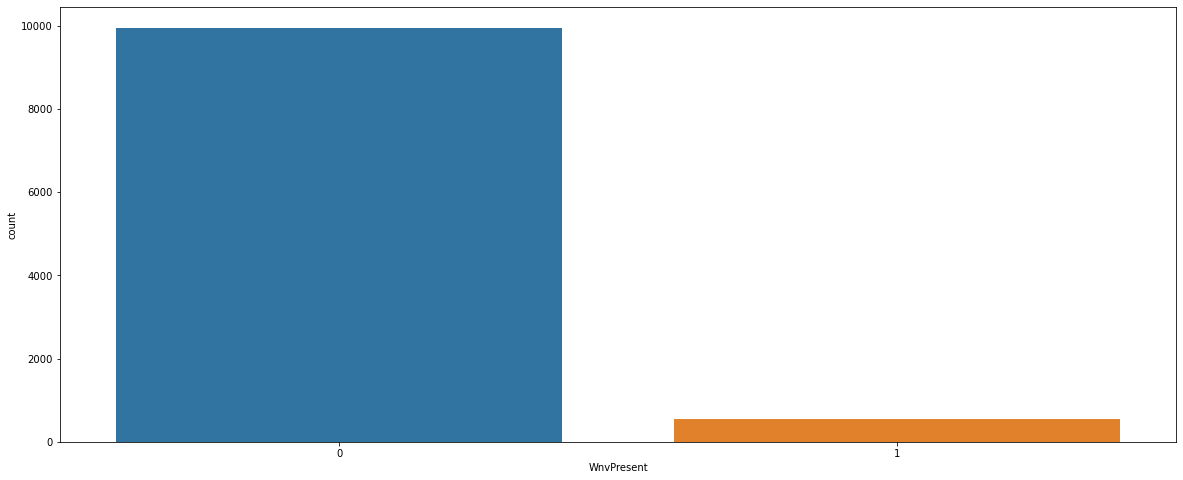

In [5]:
#Let's explore the balance in our dataset with relation to our target
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.countplot(x='WnvPresent', data=train)

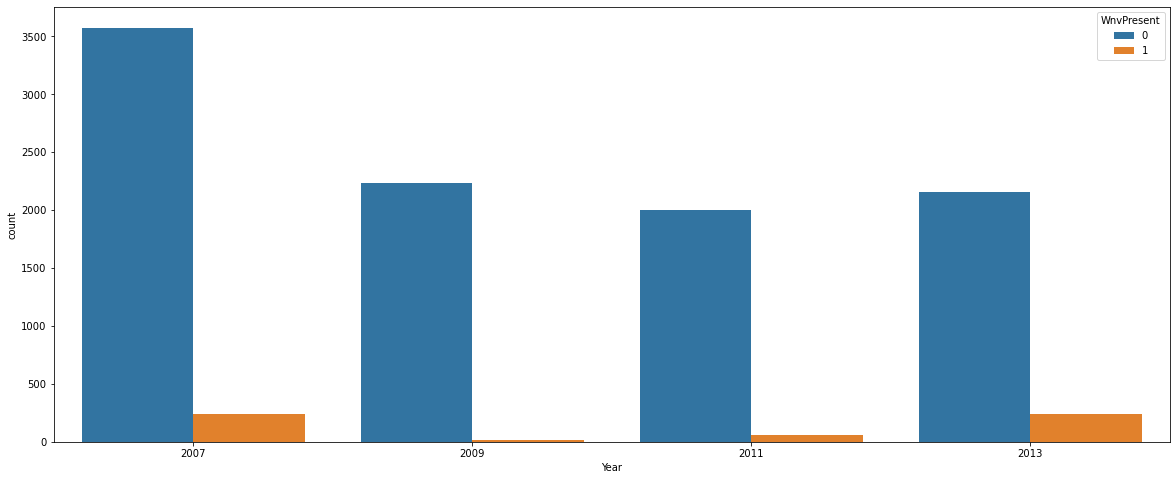

In [6]:
#Let's look into this by year
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.countplot(x='Year', data=train, hue='WnvPresent')

#### It appears the proportion of mosquitos being caught and identified with west nile virus is increasing as the years go on.

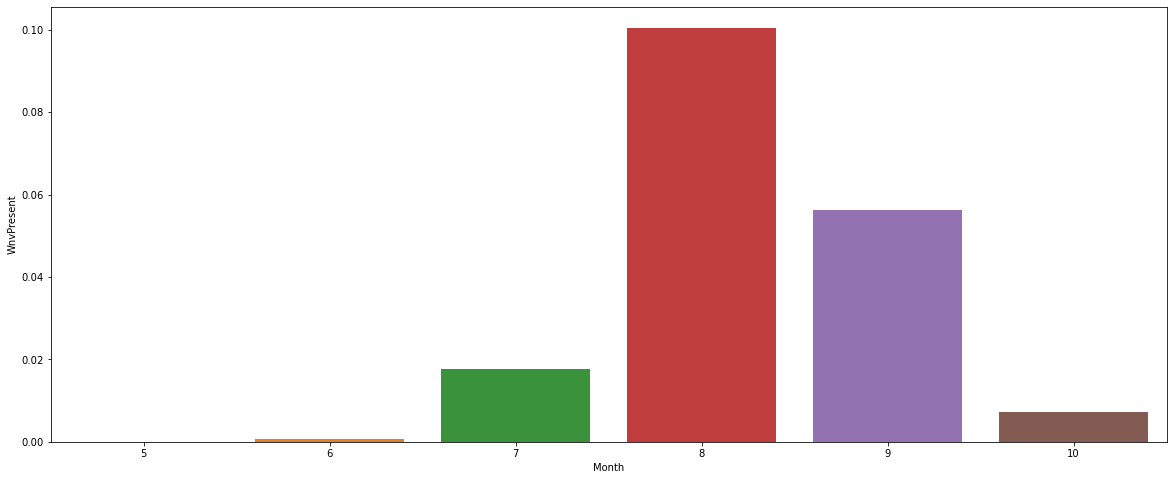

In [20]:
#Can we visualize the months during which WNV is most prevalent?
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x='Month', y='WnvPresent', data=train, ci = None)

#### Unsurpisingly, August sees a lot of activity as it pertains to west nile virus.

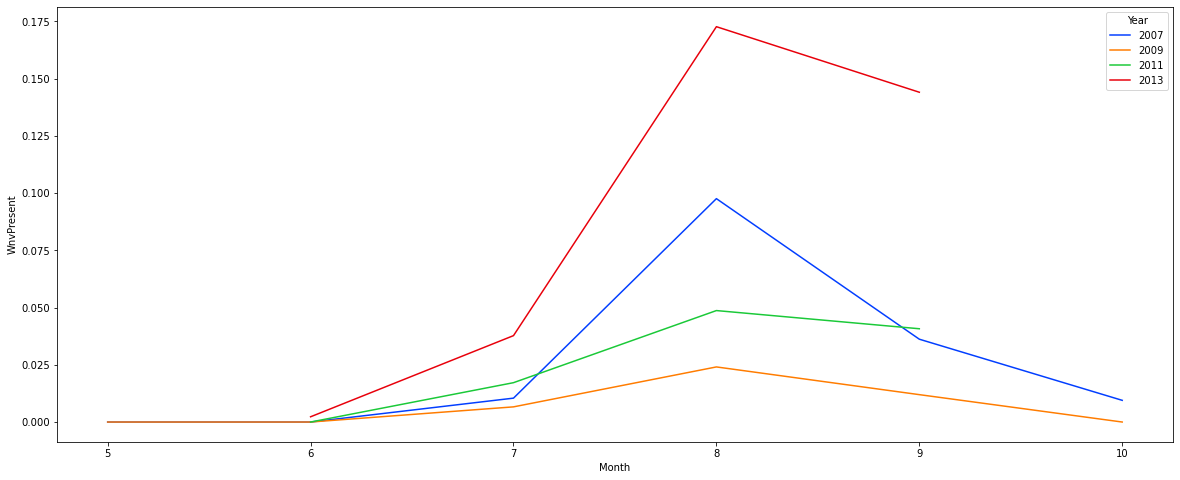

In [34]:
#Can we visualize if the monthly pattern is similar across different years?
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='WnvPresent', hue='Year', data=train, palette='bright', ci = None)

#### While instances vary by year, the monthly pattern appears to be similar from year to year. Recorded instances of west nile virus peak in August. Aside from 2007, we can also visualize the increase in west nile virus recorded from 2009 to 2011 and from 2011 to 2013.

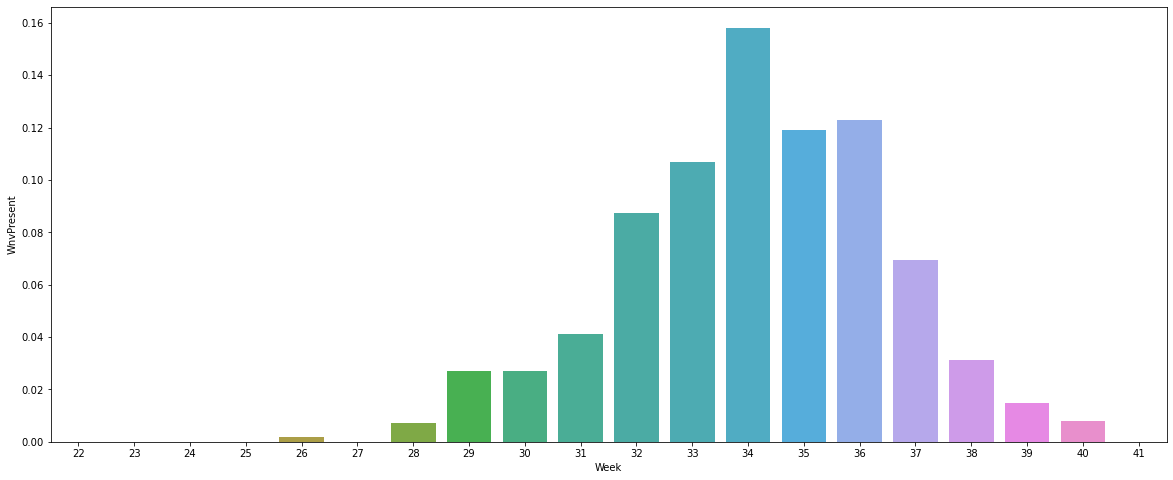

In [17]:
#Let's dive into this. What about by week?
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x='Week', y='WnvPresent', data=train, ci = None)

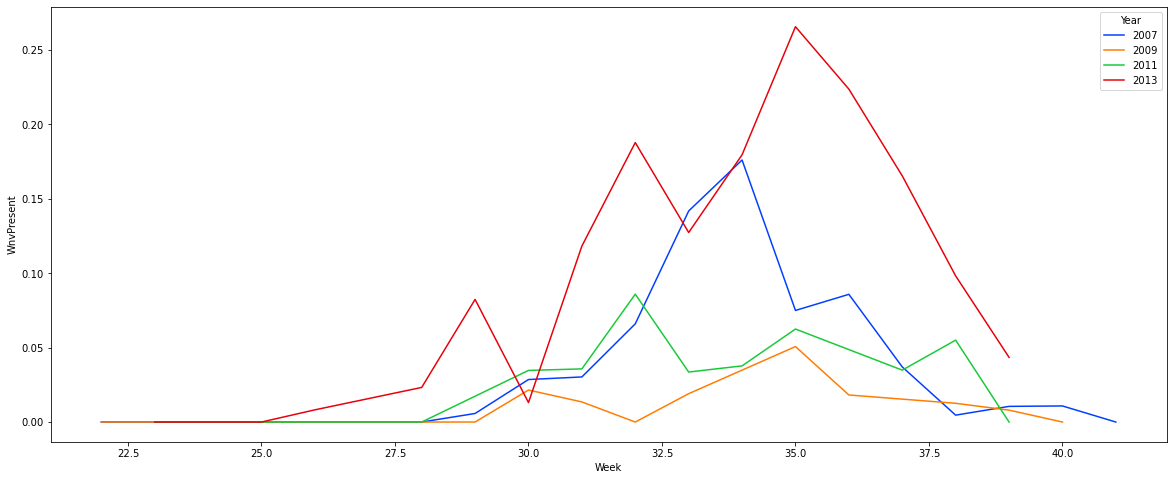

In [35]:
#Let's see if the weekly pattern holds across years
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='WnvPresent', data=train, hue='Year', palette='bright', ci = None)

#### Upon closer inspection, we can confirm west nile virus prevalence really ramps up from early August (week 32) through mid September (week 37.)

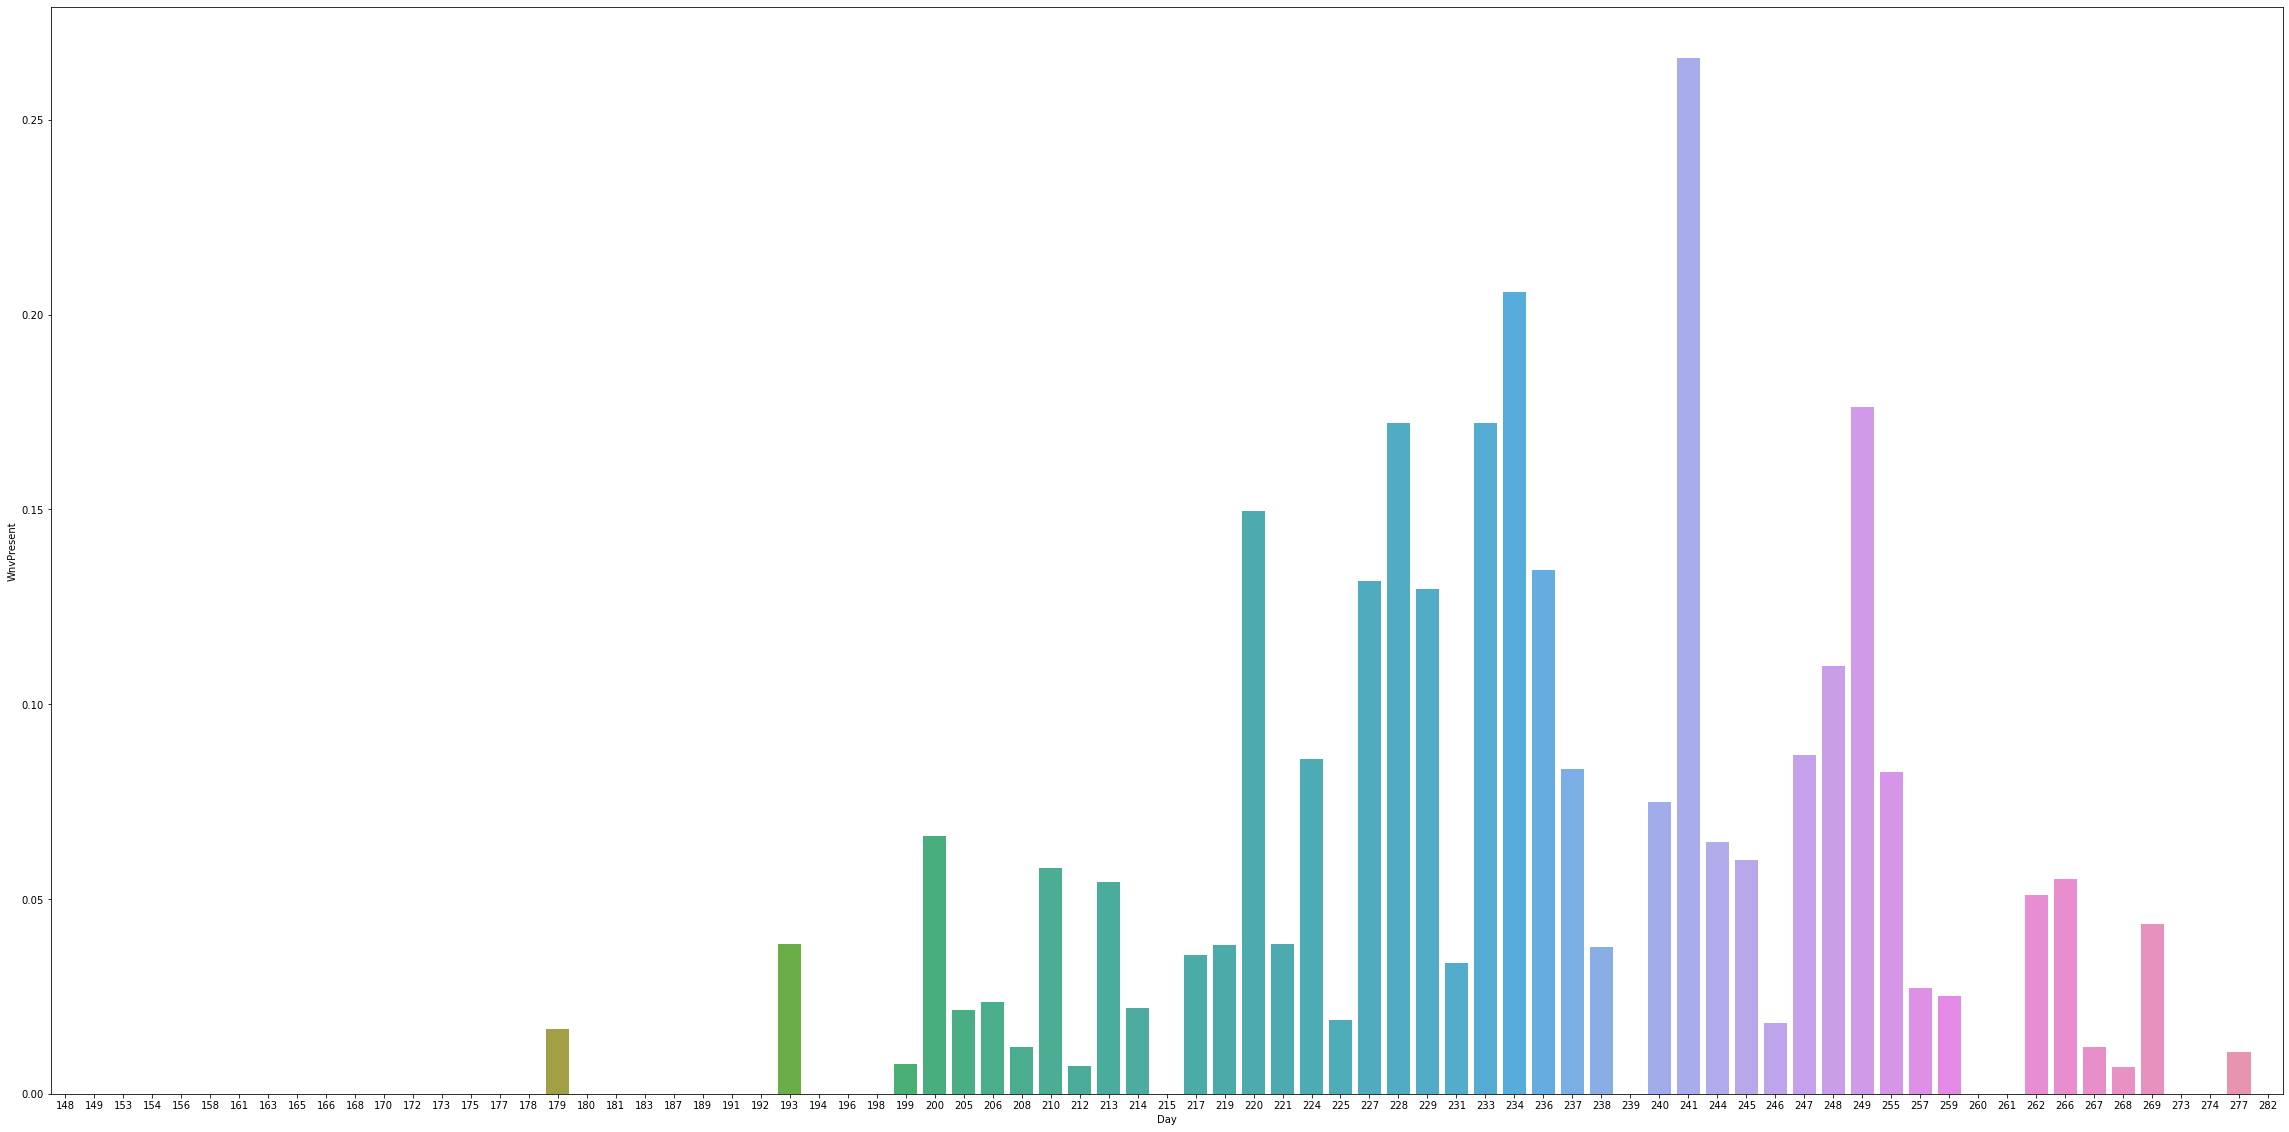

In [18]:
#Finally, let's visualize by day of the year.
fig, ax = plt.subplots(figsize=(40,20))
_ = sns.barplot(x='Day', y='WnvPresent', data=train, ci = None)

#### This is further confirmed through examining by day of year. However, we can also see some days were clearly not sampled/tested. We also don't know how many of the trapped mosquitos were tested. However, we can conclude there tends to be more mosquitos carrying west nile virus present in late July up through mid September.

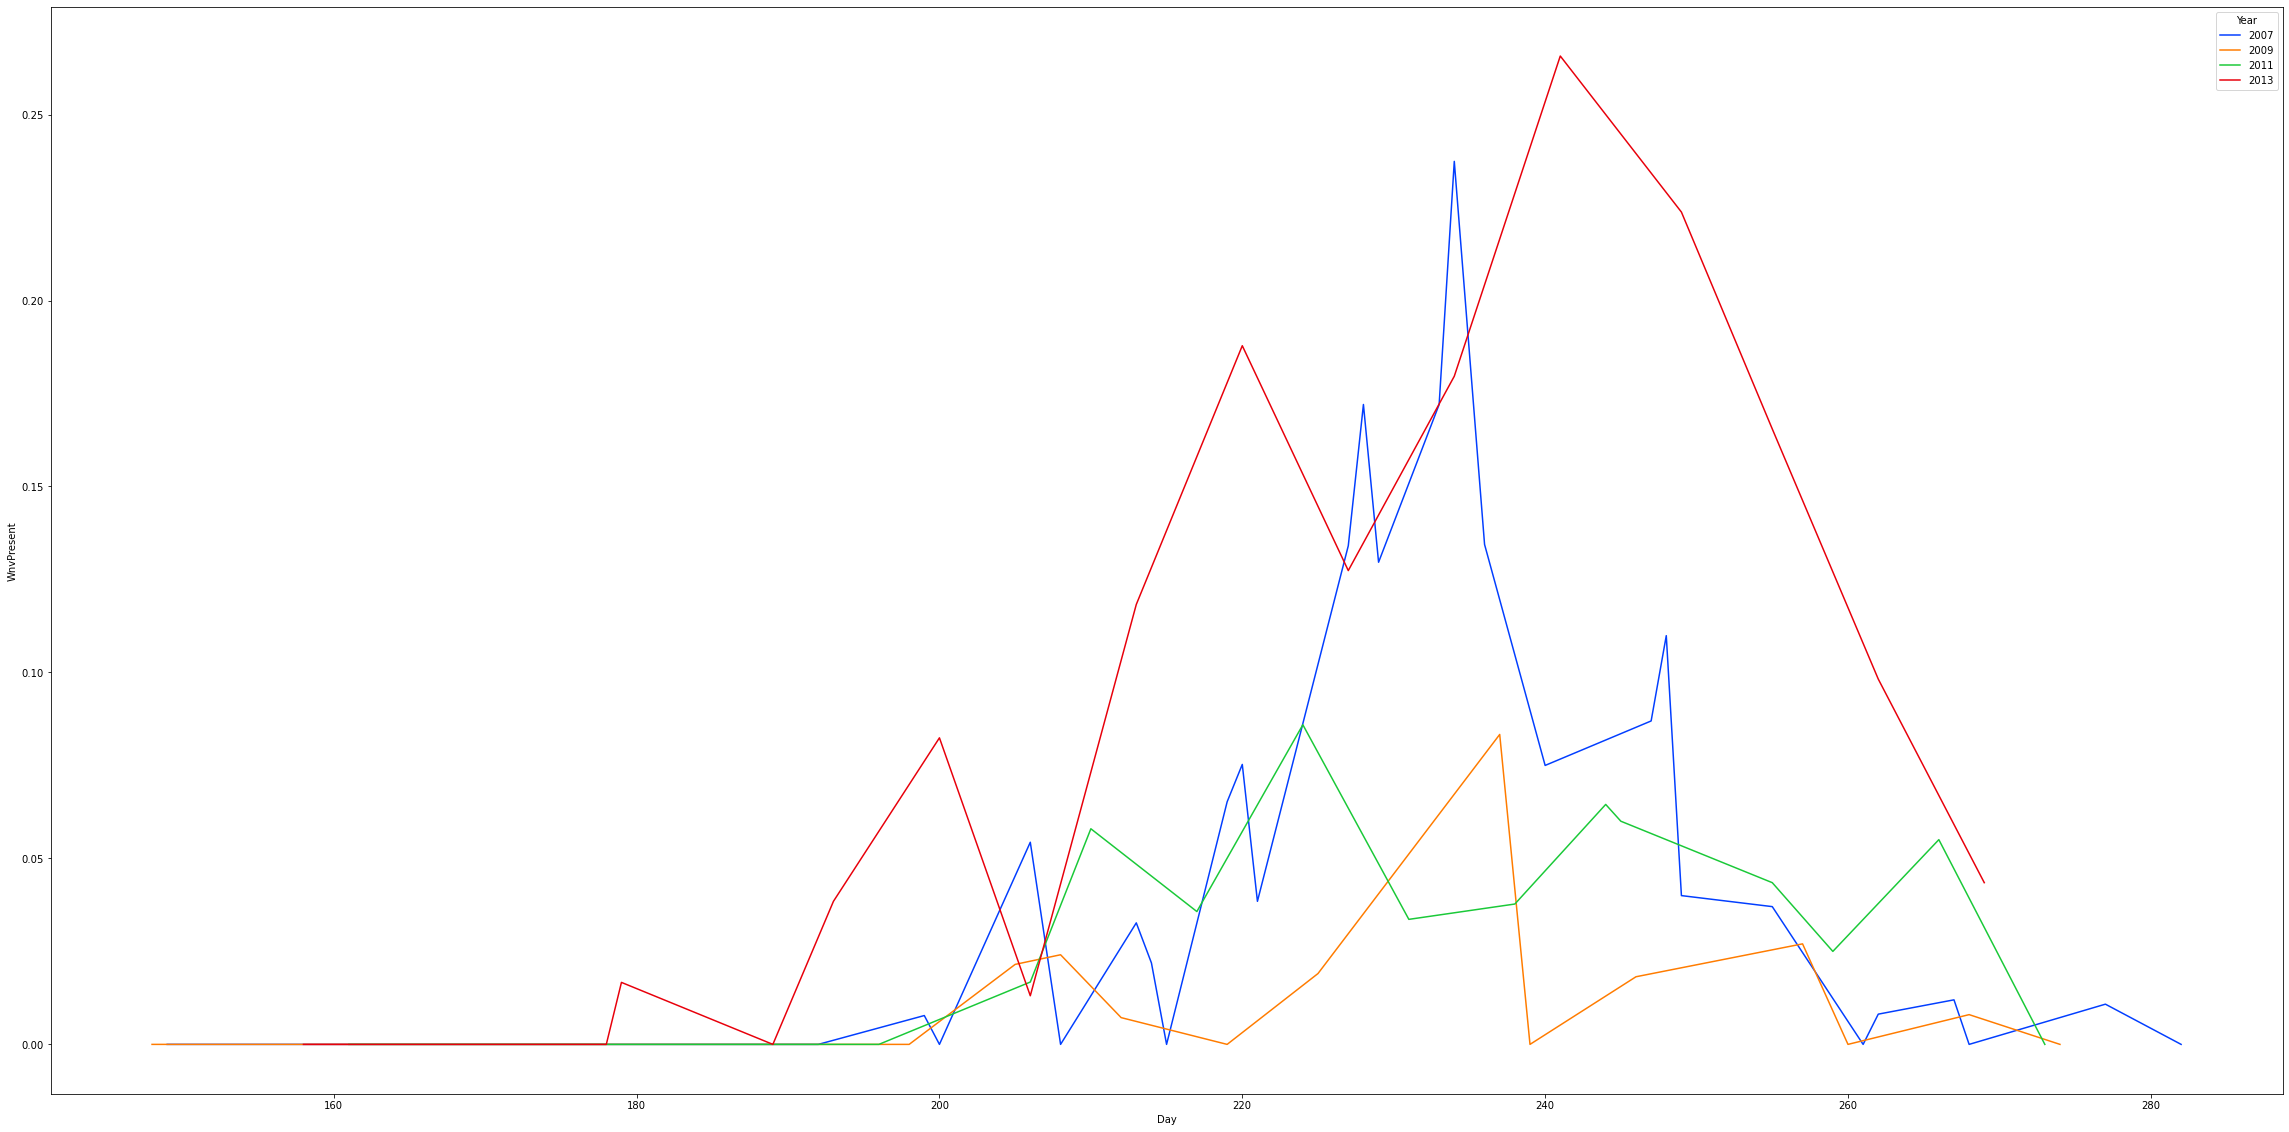

In [36]:
fig, ax = plt.subplots(figsize=(40,20))
_ = sns.lineplot(x='Day', y='WnvPresent', data=train, hue='Year', palette='bright', ci = None)

#### Let's examine our species

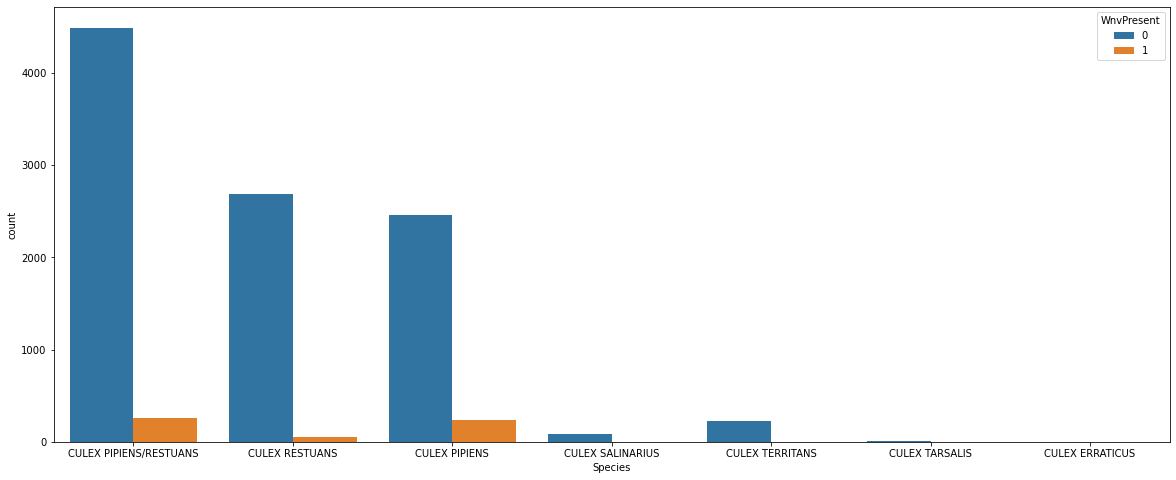

In [13]:
#Let's examine the species we're tracking and the presence of west nile virus
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.countplot(x='Species', data=train, hue='WnvPresent')

#### We're capturing mostly pipiens, restuans, and pipiens/restuans hybrids. These species also appear to be the only species carrying WNV.

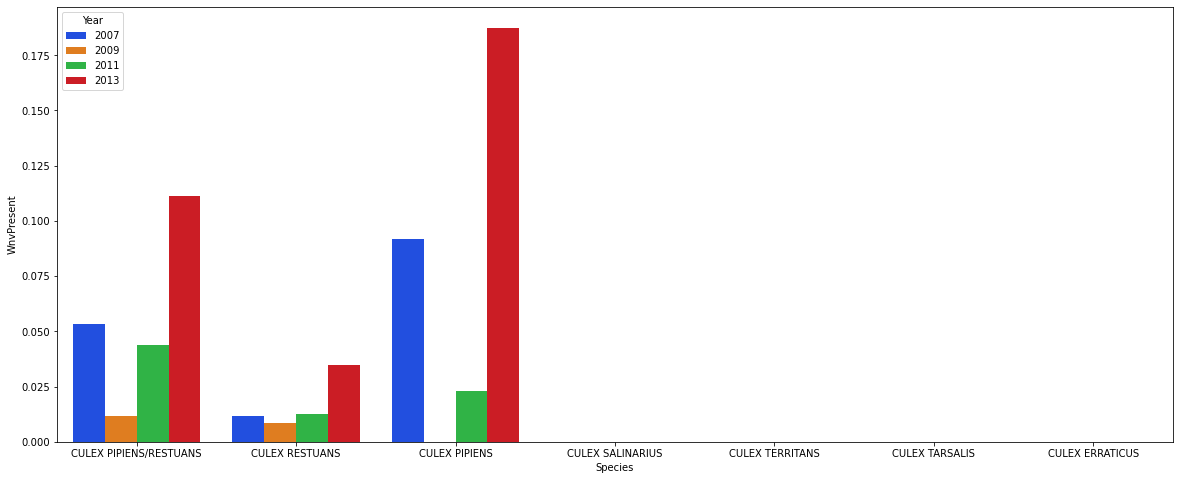

In [40]:
#How does this shake out across years?
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.barplot(x='Species', y='WnvPresent', data=train, hue='Year', ci = None)

#### This is a little less conclusive, but pipiens seems to be the major carrier while restuans is a carrier but less so. Most interesting is the hybridization of pipiens/restuans. A hybridized restuans seems more likely to be a carrier of WNV than a typical restuans. Could this indicate enhanced transimission of WNV in hybrid mosquitos?

# Weather EDA

#### Let's explore our weather dataset a bit before combining. We'll start with our average temperature.

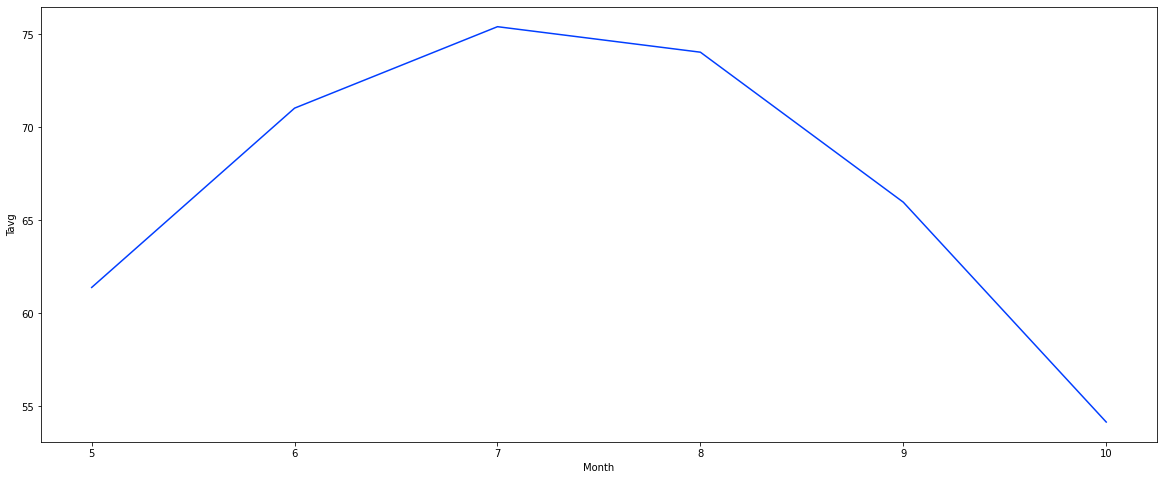

In [45]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='Tavg', data=weather, palette='bright', ci = None)

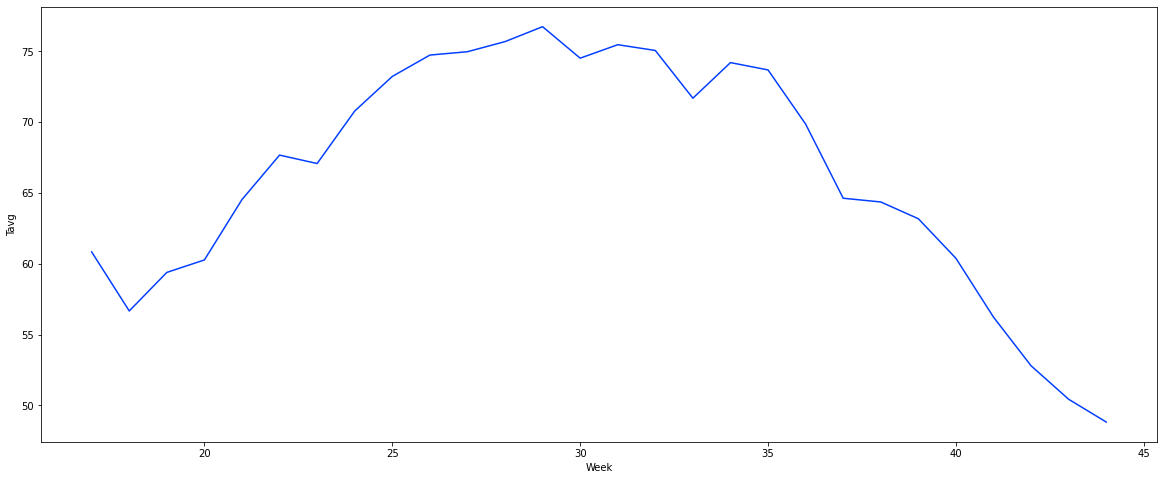

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='Tavg', data=weather, palette='bright', ci = None)

#### Our average temperature seems to peak in mid to late July. These are great breeding conditions for mosquitos, and we suspect this could lead to their increased presence in August.

#### Let's look at precipitation. 

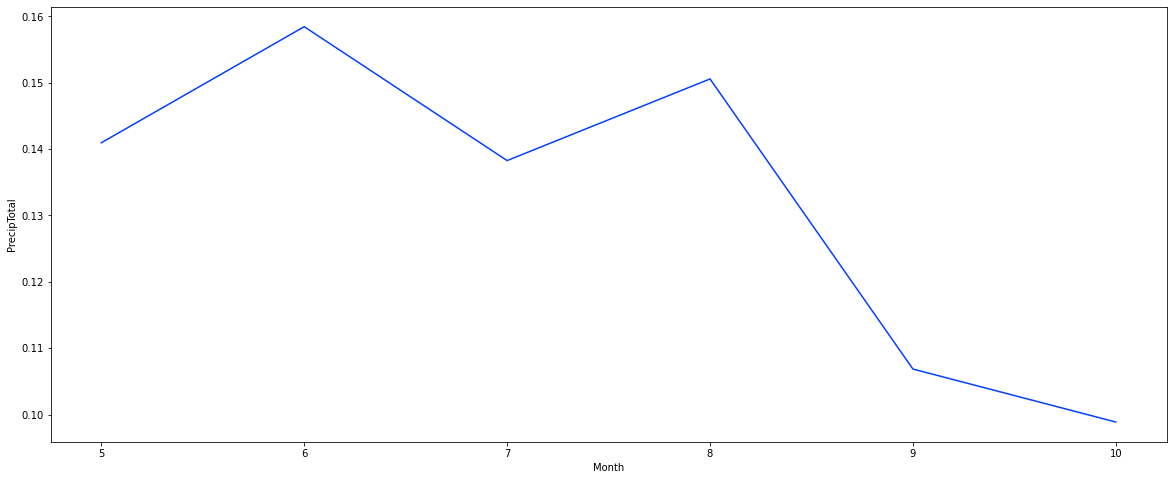

In [48]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='PrecipTotal', data=weather, palette='bright', ci = None)

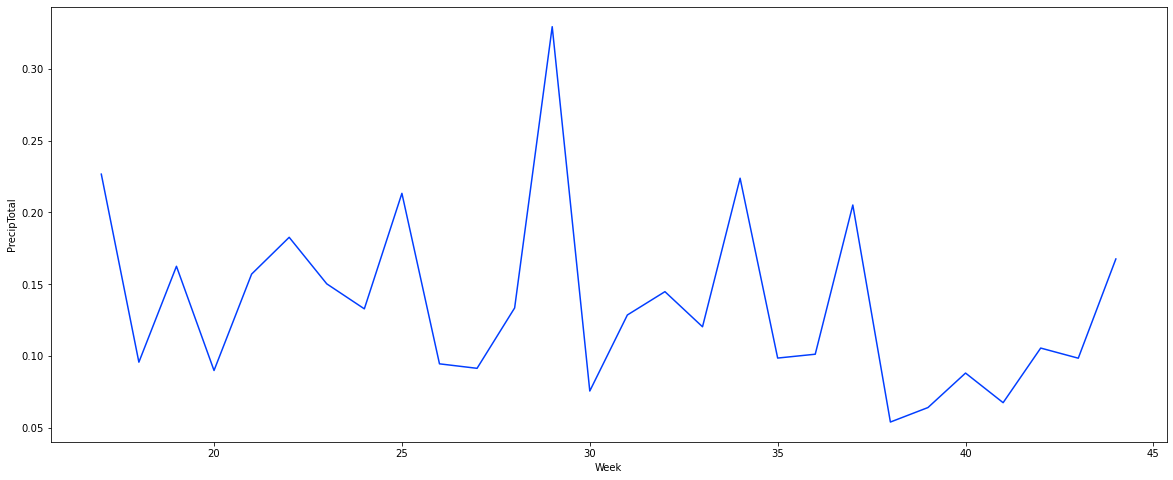

In [49]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='PrecipTotal', data=weather, palette='bright', ci = None)

#### There's a nice bump in precipitation leading into July and through mid/late July, and we know mosquitos like standing water.

#### Let's look at WetBulb and DewPoint

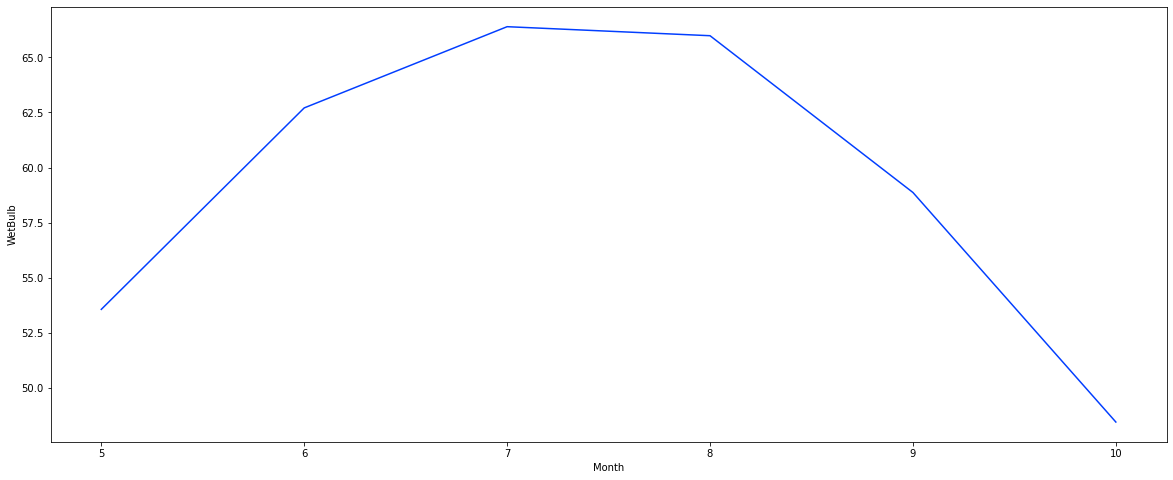

In [50]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='WetBulb', data=weather, palette='bright', ci = None)

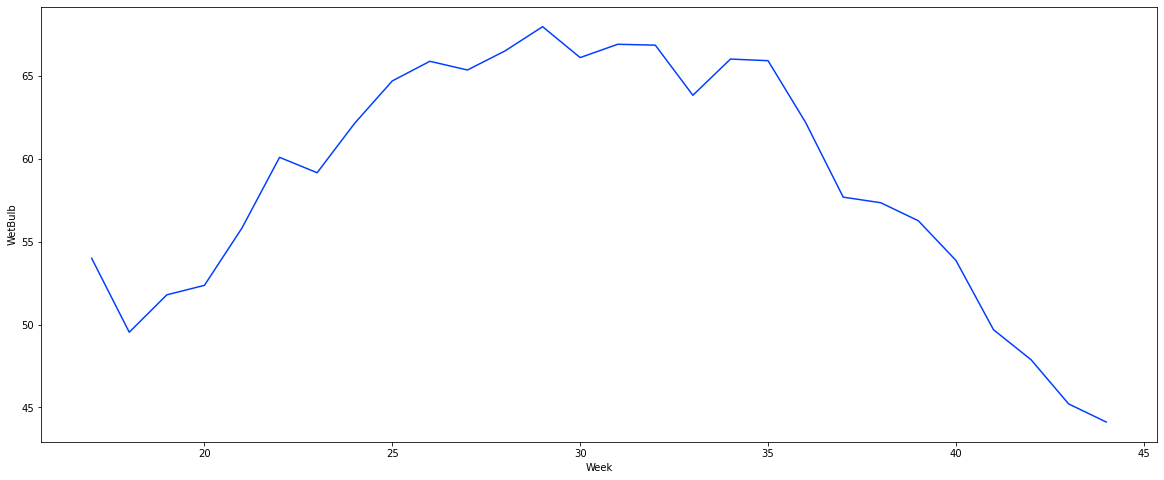

In [52]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='WetBulb', data=weather, palette='bright', ci = None)

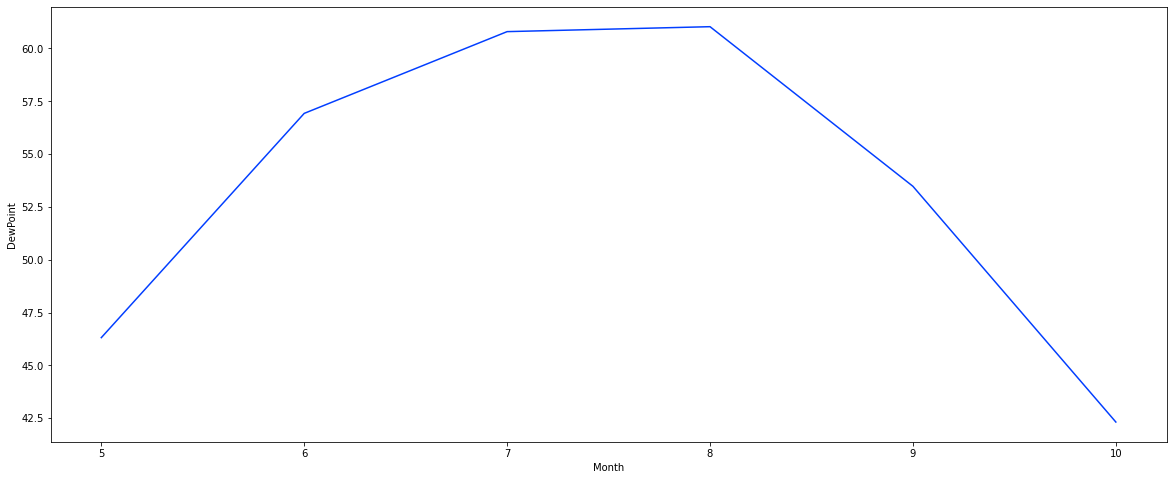

In [53]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='DewPoint', data=weather, palette='bright', ci = None)

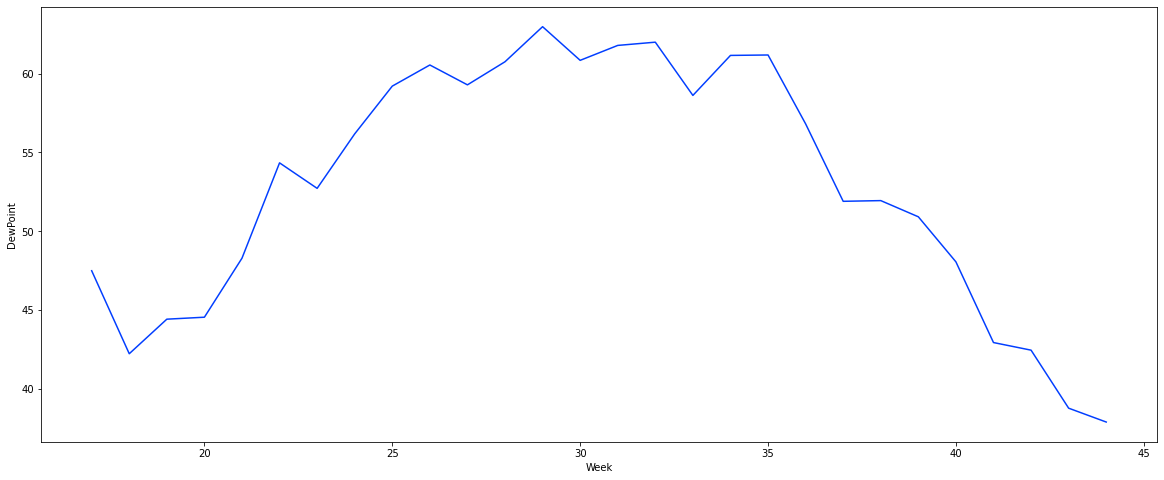

In [54]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='DewPoint', data=weather, palette='bright', ci = None)

#### Both WetBulb and DewPoint seem to incidate more damp, and humid conditions From June through early August. Our research indiciates these conditions tend to favor mosquito activity, specifically breeding activity, as heavy rains can damage them and conditions that are too hot and dry can dehydrate them.

#### Interestingly, researches have also discovered mosquitos will seek a blood meal when conditions are dry and they are dehydrated. Could mosquitos be breeding in late June through early August and seeking blood meal in August and early September when it's hot, dry, and precipitation/moisture tapers off?

#### Finally, let's look at wind

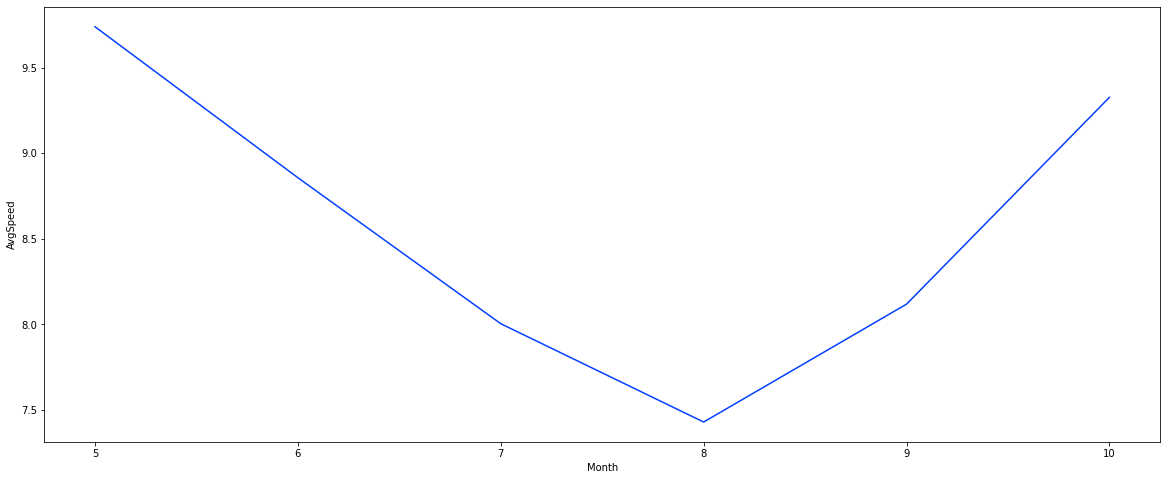

In [55]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Month', y='AvgSpeed', data=weather, palette='bright', ci = None)

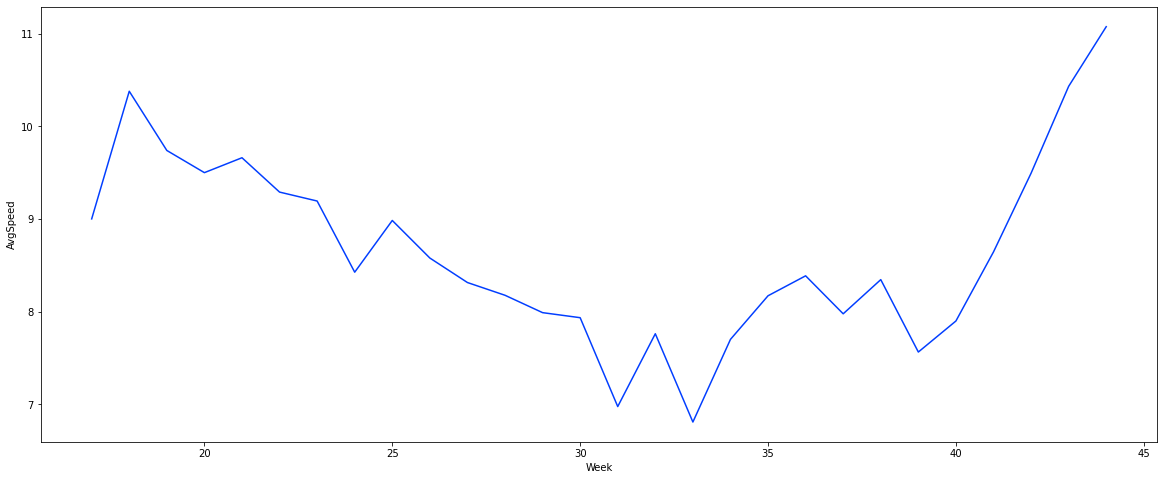

In [56]:
fig, ax = plt.subplots(figsize=(20,8))
_ = sns.lineplot(x='Week', y='AvgSpeed', data=weather, palette='bright', ci = None)

#### Average wind is fairly low in July and September, but very low in August. Research has shown Mosquitos do not like high wind. 

#### Our basic EDA is painting a picture that seems to show prime breeding conditions (warm, humid, damp, relatively low wind) in June and July with prime conditions for female mosquitos to seek a blood meal (hot, dry, very low wind) in late July through early September.

#### Let's now join and explore the weather and training datasets.

In [57]:
combined = pd.merge(train, weather,on=['Date', 'Year', 'Month', 'Week', 'Day'],how='left')

In [68]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         10506 non-null  datetime64[ns]
 1   Species      10506 non-null  object        
 2   Latitude     10506 non-null  float64       
 3   Longitude    10506 non-null  float64       
 4   WnvPresent   10506 non-null  int64         
 5   Year         10506 non-null  int64         
 6   Month        10506 non-null  int64         
 7   Week         10506 non-null  UInt32        
 8   Day          10506 non-null  int64         
 9   Tmax         10506 non-null  float64       
 10  Tmin         10506 non-null  float64       
 11  Tavg         10506 non-null  float64       
 12  Depart       10506 non-null  float64       
 13  DewPoint     10506 non-null  float64       
 14  WetBulb      10506 non-null  float64       
 15  Heat         10506 non-null  float64       
 16  Cool

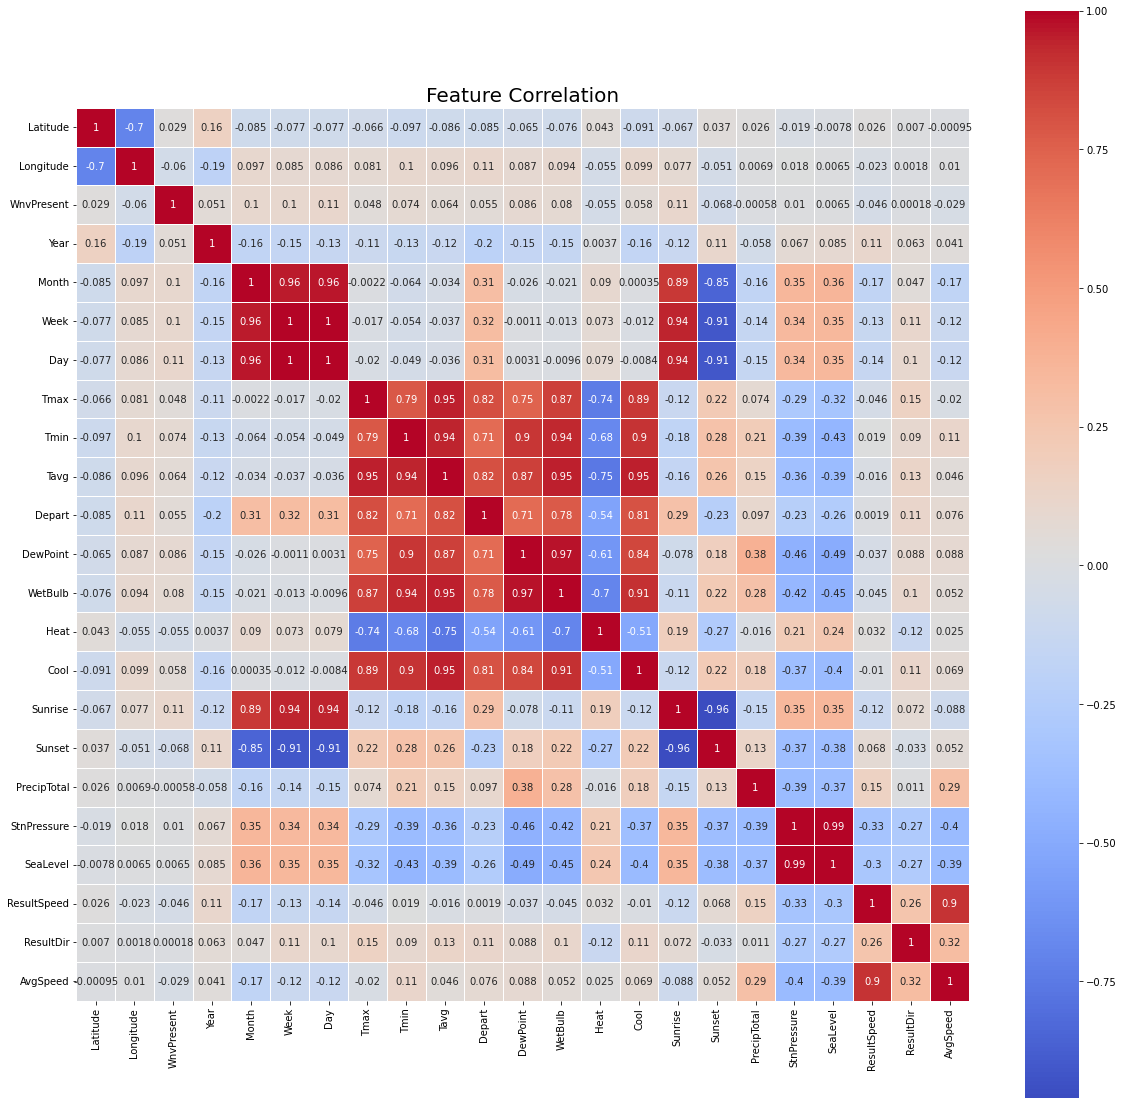

In [80]:
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(combined.corr(), cmap='coolwarm', square=True, annot=True, linewidth=1)
_ = ax.set_title('Feature Correlation', fontsize=20)

In general, features tend to have a low correlation with our target, WnvPresent, but some features have high correlation with one another. We will adjust and create new features in the following notebook. For now, let's see if we can gather any additional information from EDA of the combined dataset.

Let's dig into temperature a bit.

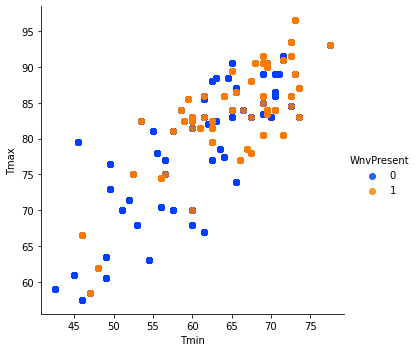

In [92]:
sns.lmplot(x='Tmin', y='Tmax', hue='WnvPresent', data=combined, fit_reg=False, ci = None)

In general, as the temperature increases so do instances of west nile virus.

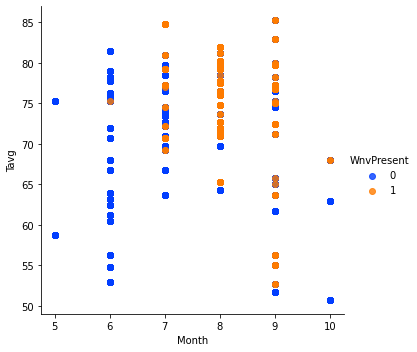

In [98]:
sns.lmplot(x='Month', y='Tavg', hue='WnvPresent', fit_reg=False, data=combined)

This is an interesting plot. We don't see much in May or June, but July and August sees west nile virus present at temperatures of, roughly, 68f and above. What's very interesting is September, where we see instances of west nile virus at much lower temperatures.

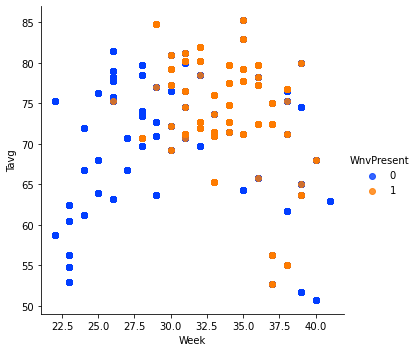

In [118]:
sns.lmplot(x='Week', y='Tavg', hue='WnvPresent', fit_reg=False, data=combined)

This observation holds when viewing this on a weekly basis. July and August see quite a few WNV instances, with September seeing them also (though, many at lower temps.) I suspect these are the remaining mosquitos being trapped before they day out in the colder weather.

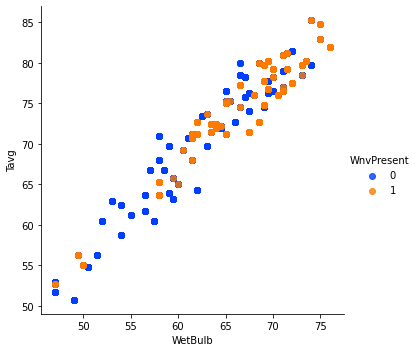

In [88]:
sns.lmplot(x='WetBulb', y='Tavg', hue='WnvPresent', data=combined, fit_reg=False, ci = None)

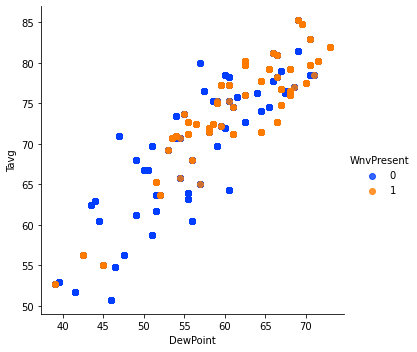

In [89]:
sns.lmplot(x='DewPoint', y='Tavg', hue='WnvPresent', data=combined, fit_reg=False, ci = None)

Interestingly, we don't see many instances of west nile virus below certain WetBulb and DewPoint levels, even at higher temperatures. We should investigate this next.

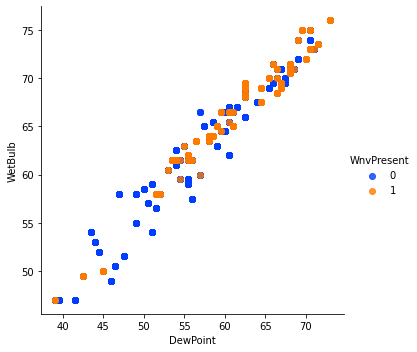

In [104]:
sns.lmplot(x='DewPoint', y='WetBulb', hue='WnvPresent', data=combined, fit_reg=False, ci = None)

This plot can help us confirm we record more west nile virus instances when the indicators for humidity are above a certain level.

<AxesSubplot:xlabel='Day', ylabel='PrecipTotal'>

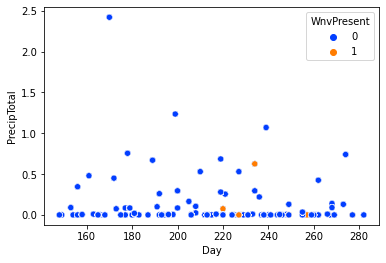

In [132]:
sns.scatterplot(x='Day', y='PrecipTotal', hue='WnvPresent', data=combined, ci = None)

Precipitation totals don't tell us much at this point. Mosquitos may prefer some precepitation in warmer months but too much does not seem to be preferred.

Finally, let's look at wind

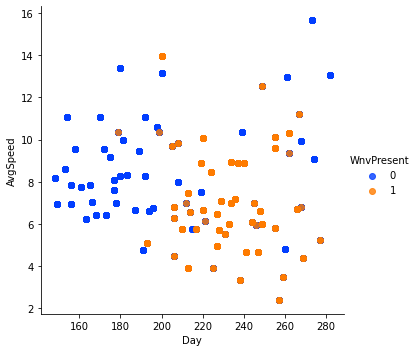

In [124]:
sns.lmplot(x='Day', y='AvgSpeed', hue='WnvPresent', data=combined, fit_reg=False,  ci = None)

We can observe more instances of west nile virus detection the lower the average windspeed is. This agrees with research that mosquitos dislike too much wind.

The exploratory EDA seems to corroborate recent research on mosquitos and west nile virus. Our EDA shows that specific carriers of west nile virus prefer warm, damp, and humid weather. They also seem to come out for blood meals when they are dehydrated and the weather is hot and dry.

However, they also seem to dislike extreme conditions on both ends of the spectrum. Weather that is cold, overly rainy, too dry, or too windy does not seem to benefit them.